In [1]:
# Name: Chandrasekhar yadav & Roll No:M22AI540

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Define the paths to your image and csv folders
train_val_dir = "C:\\Users\\chand\\Downloads\\charts\\charts\\train_val"
test_dir = "C:\\Users\\chand\\Downloads\\charts\\charts\\test"
train_path_labels = "C:\\Users\\chand\\Downloads\\charts\\charts\\train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)

In [3]:
train_val_labels

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [4]:
# load training dataset in numpy array
images = []
labels = []
for f in os.listdir(train_val_dir):
 if f.endswith('.png'):
     # Load the images and resize them to (128, 128) with 3 color channels
     img = cv2.imread(os.path.join(train_val_dir, f))
     img = cv2.resize(img, (128, 128))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # img = Image.open(os.path.join(train_val_dir, filename))
     img_array = np.array(img)
     # Append the array to the list of images
     images.append(img_array)
     labels.append(f)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

In [5]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [8]:
# load test dataset in numpy array
images = []
labels = []
for f in os.listdir(test_dir):
 if f.endswith('.png'):
     # Load the images and resize them to (128, 128) with 3 color channels
     img = cv2.imread(os.path.join(test_dir, f))
     img = cv2.resize(img, (128, 128))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # img = Image.open(os.path.join(test_dir, filename))
     img_array = np.array(img)
     # Append the array to the list of images
     images.append(img_array)
     labels.append(f)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays

In [9]:
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

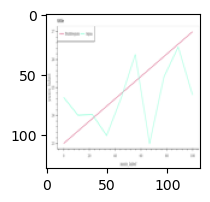

In [11]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])


In [12]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape

(50,)

In [13]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

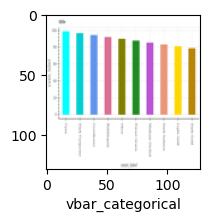

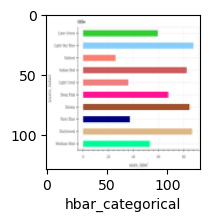

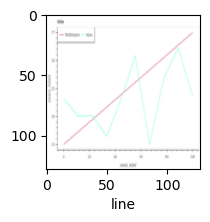

In [14]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [15]:

# now we have mapped the corresponding labels to the image
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255

In [16]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [17]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 12s 345ms/step - loss: 5.9032 - accuracy: 0.2010
Epoch 2/10
32/32 [==============================] - 11s 347ms/step - loss: 1.6196 - accuracy: 0.2230
Epoch 3/10
32/32 [==============================] - 11s 351ms/step - loss: 1.6056 - accuracy: 0.2500
Epoch 4/10
32/32 [==============================] - 12s 365ms/step - loss: 1.5960 - accuracy: 0.2940
Epoch 5/10
32/32 [==============================] - 12s 376ms/step - loss: 1.5704 - accuracy: 0.2720
Epoch 6/10
32/32 [==============================] - 12s 379ms/step - loss: 1.5778 - accuracy: 0.2360
Epoch 7/10
32/32 [==============================] - 12s 386ms/step - loss: 1.5775 - accuracy: 0.2830
Epoch 8/10
32/32 [==============================] - 12s 386ms/step - loss: 1.5821 - accuracy: 0.2410
Epoch 9/10
32/32 [==============================] - 12s 387ms/step - loss: 1.5900 - accuracy: 0.2560
Epoch 10/10
32/32 [==============================] - 12s 388ms/step - loss: 1.5946 - accura

In [18]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 83ms/step - loss: 1.7948 - accuracy: 0.1900


[1.7948466539382935, 0.1899999976158142]

In [19]:

y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 1s 97ms/step


In [20]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)


Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 5s 5s/step - loss: 1.6422 - accuracy: 0.1863 - val_loss: 2.0496 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 1.9650 - accuracy: 0.2087 - val_loss: 1.6246 - val_accuracy: 0.1900
Epoch 3/50
1/1 [==============================] - 3s 3s/step - loss: 1.6174 - accuracy: 0.2025 - val_loss: 1.5843 - val_accuracy: 0.1900
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 1.6065 - accuracy: 0.2062 - val_loss: 1.5566 - val_accuracy: 0.3500
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 1.5808 - accuracy: 0.3262 - val_loss: 1.5283 - val_accuracy: 0.3100
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 1.5386 - accuracy: 0.2925 - val_loss: 1.5140 - val_accuracy: 0.4700
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 1.5021 - accuracy: 0.4100 - val_loss: 1.4831 - val_accuracy: 0.3550
Epoch 8/50
1/1 [=========================

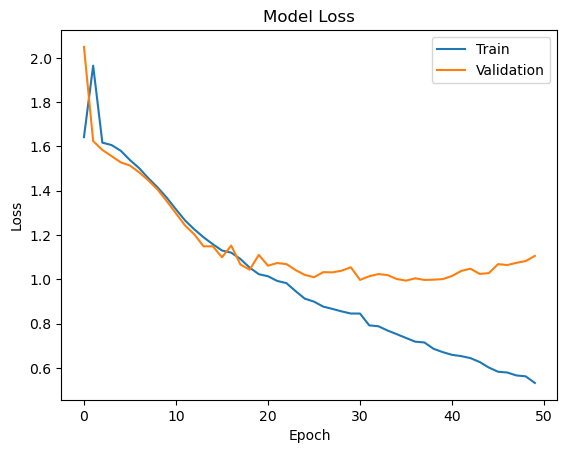

In [21]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [22]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 0s 44ms/step - loss: 1.1060 - accuracy: 0.6050


[1.106033205986023, 0.6050000190734863]

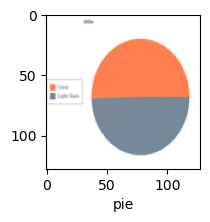

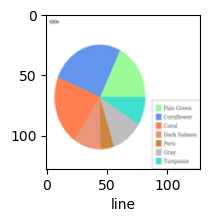

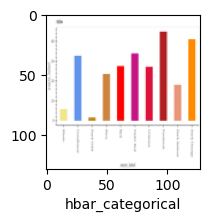

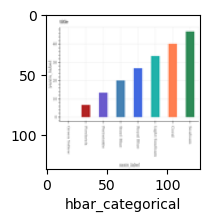

In [23]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [24]:

y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 0s 40ms/step


array([[4.90100384e-01, 1.31450579e-01, 2.85560191e-01, 4.10659127e-02,
        5.18229418e-02],
       [1.13647796e-01, 1.88746061e-02, 8.05900141e-04, 5.72059490e-02,
        8.09465766e-01],
       [5.94155192e-01, 1.36298016e-02, 2.42566294e-03, 1.72015391e-02,
        3.72587770e-01],
       [8.04913342e-01, 3.82811355e-04, 2.17554085e-02, 3.34947929e-02,
        1.39453739e-01],
       [5.89369655e-01, 5.52187972e-02, 2.98962116e-01, 2.46230476e-02,
        3.18263546e-02]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]


[0, 4, 0, 0, 0]

In [26]:
y_test[:5]


array([0, 4, 4, 4, 0])

'dot_line'

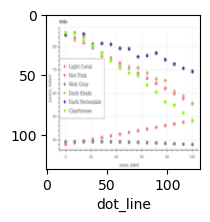

In [27]:
# here we see some values are not matching
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted

In [28]:
# some values are not matching
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.49      0.59      0.54        37
           1       0.84      0.73      0.78        44
           2       0.62      0.42      0.50        48
           3       0.44      0.67      0.53        33
           4       0.71      0.66      0.68        38

    accuracy                           0.60       200
   macro avg       0.62      0.61      0.61       200
weighted avg       0.63      0.60      0.61       200



In [29]:

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[22  4  0  4  7]
 [ 7 32  1  3  1]
 [ 8  1 20 18  1]
 [ 0  1  9 22  1]
 [ 8  0  2  3 25]]


Text(95.72222222222221, 0.5, 'Actual')

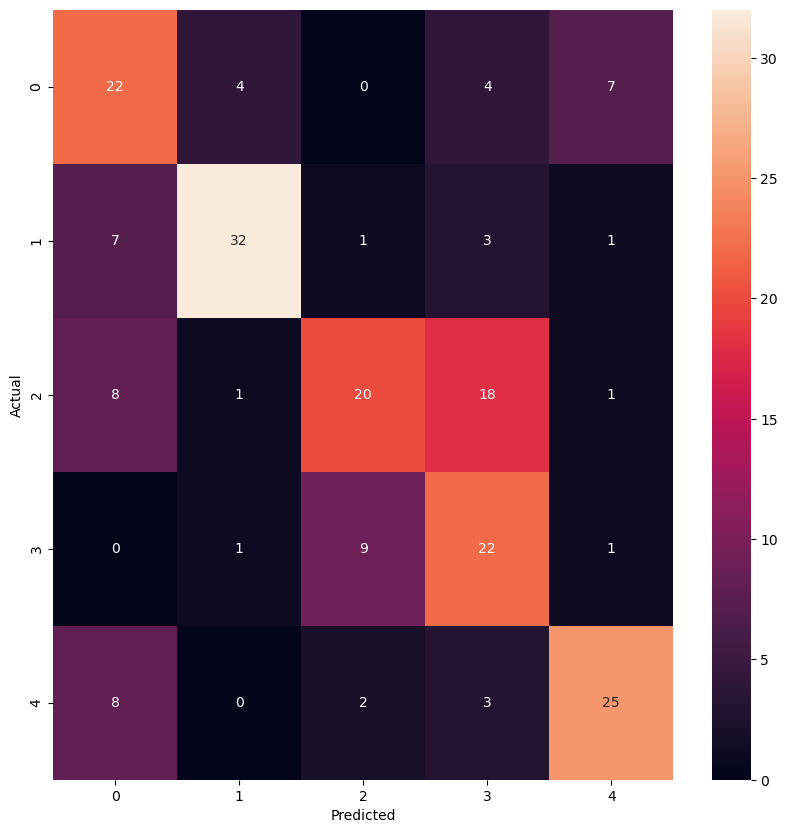

In [30]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
